# Consistance Tests: SED

This is going to be the figure that shows that this is self consistent with regard to the selected model having an SED that matches the data. It will be 6 sub-plots each showing the selected model's SED and the data.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import fsps
from astropy.cosmology import FlatLambdaCDM

set up cosmology to get age of the universe at the observed redshift to know when to stop the stellar popultion. -- define A(z) better.

Also define the FSPS object and other useful values like the x-axis for plotting.

In [6]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.27)

In [7]:
sp = fsps.StellarPopulation(zcontinuous=2, cloudy_dust=True, add_neb_emission = True, sfh=5)

In [2]:
wavelengths = [3551, 4686, 6166, 7480, 8932]    # for u, g, r, i, z filters
filters = ['u', 'g', 'r', 'i', 'z']

Define data and best fit models

In [15]:
data = {
    1 : np.array([20.36, 18.76, 17.99, 17.67, 17.39]),
    2 : np.array([20.31, 18.74, 17.98, 17.66, 17.39]),
    3 : np.array([16.15, 15.43, 15.4, 15.19, 15.21]),
    4 : np.array([17.65, 16.74, 16.49, 16.26, 16.16]),
    5 : np.array([19.69, 18.29, 17.7, 17.45, 17.29]),
    6 : np.array([17.66, 16.58, 16.25, 16.01, 15.86])
}

uncert = {
    1 : np.array([0.1, 0.1, 0.1, 0.1, 0.1]),
    2 : np.array([0.1, 0.1, 0.1, 0.1, 0.1]),
    3 : np.array([0.1, 0.1,0.1, 0.1, 0.1]),
    4 : np.array([0.1, 0.1, 0.1, 0.1, 0.1]),
    5 : np.array([0.1, 0.1,0.1, 0.1, 0.1]),
    6 : np.array([0.1, 0.1, 0.1, 0.1, 0.1])
}

# logz, t_dust, 
# from 2017-10-02 job 277287.1-6:1
model = {
    1 : np.array([0.46, 0.17, 5.22, 1.41, 5.27, -0.88]),
    2 : np.array([-0.56, 0.18, 0.53, 2.11, 10.43, -0.44]),
    3 : np.array([-0.67, 0.10, 7.8, 4.35, 10.93, 1.16]),
    4 : np.array([-0.47, 0.17, 5.57, 2.4, 7.81, 0.08]),
    5 : np.array([-1.1, 0.1, 7.71, 2.63, 8.87, -0.96]),
    6 : np.array([-0.38, 0.43, 7.35, 6.60, 11.41, -0.03])
}

c = {
    1 : -24.93,
    2 : -24.98,
    3 : -25.23,
    4 : -24.98,
    5 : -24.63,
    6 : -25.24
}

redshift = 0.05

Get the SED for the model.

In [9]:
def get_sed(sp, redshift, logzsol, dust2, tau, tStart, sfTrans, sfSlope):
    """same as `calculateAge.runFSPS()` as of 2017-10-05
    """
    sdss_bands = ['sdss_u', 'sdss_g', 'sdss_r', 'sdss_i', 'sdss_z']

    sp.params['logzsol'] = logzsol
    
    dust1 = 2.0*dust2
    sp.params['dust1'] = dust1
    sp.params['dust2'] = dust2

    sp.params['tau'] = tau
    sp.params['sf_start'] = tStart
    sp.params['sf_trunc'] = sfTrans
    sp.params['sf_slope'] = sfSlope

    tage = cosmo.age(redshift).to('Gyr').value

    return sp.get_mags(tage=tage, redshift=redshift, bands=sdss_bands)

In [33]:
model_sed = {}
for i in range(1, 7):
    model_sed[i] = get_sed(sp, redshift, *model[i])

Make the figure

In [34]:
model_sed

{1: array([ 46.31473796,  44.37802032,  43.46446025,  43.06326573,  42.64070477]),
 2: array([ 45.35142501,  43.75998646,  42.99532415,  42.67065123,  42.40004582]),
 3: array([ 41.54072812,  40.85958706,  40.76545066,  40.54392389,  40.57140023]),
 4: array([ 42.69522381,  41.78647374,  41.5050169 ,  41.26948519,  41.16984455]),
 5: array([ 44.30348682,  42.88856501,  42.30085045,  42.05561681,  41.89136657]),
 6: array([ 42.92634932,  41.85681756,  41.50378581,  41.25880583,  41.10855899])}

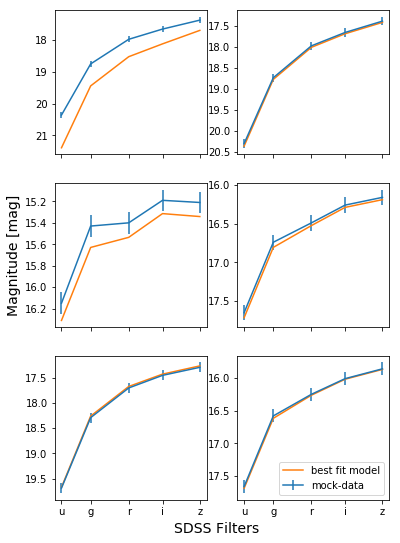

In [91]:
plt.figure('SED Consistence Test')

# row and column sharing
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex='col', figsize=(6, 9))

# add uncertainty
ax1.errorbar(wavelengths, data[1], yerr=uncert[1])
ax1.plot(wavelengths, model_sed[1] + c[1])
ax1.invert_yaxis()
# ax1.set_title('1')
# ax1.text(0.5, 0.5, '1')

ax2.errorbar(wavelengths, data[2], yerr=uncert[2])
ax2.plot(wavelengths, model_sed[2] + c[2])
ax2.invert_yaxis()

ax3.errorbar(wavelengths, data[3], yerr=uncert[3])
ax3.plot(wavelengths, model_sed[3] + c[3])
ax3.invert_yaxis()

ax4.errorbar(wavelengths, data[4], yerr=uncert[4])
ax4.plot(wavelengths, model_sed[4] + c[4])
ax4.invert_yaxis()
# ax4.set_title('4')

ax5.errorbar(wavelengths, data[5], yerr=uncert[5])
ax5.plot(wavelengths, model_sed[5] + c[5])
ax5.invert_yaxis()

ax6.errorbar(wavelengths, data[6], yerr=uncert[6], label='mock-data')
ax6.plot(wavelengths, model_sed[6] + c[6], label='best fit model')
ax6.invert_yaxis()


plt.legend()

ax3.set_ylabel('Magnitude [mag]', size=14)

ax5.set_xticks(wavelengths)
ax5.set_xticklabels(filters)
ax6.set_xticks(wavelengths)
ax6.set_xticklabels(filters)

# ax5.set_xlabel('SDSS Filters')
# ax6.set_xlabel('SDSS Filters')
# https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
f.text(0.5, 0.08, 'SDSS Filters', ha='center', va='center', size=14)


# ax1.set_title('Sharing x per column, y per row')
# ax2.scatter(x, y)
# ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# ax4.plot(x, 2 * y ** 2 - 1, color='r')

plt.savefig('del_consistancy_sed.pdf')
plt.show()

In [67]:
from pylab import rcParams
rcParams['figure.figsize']

[6.0, 4.0]